In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from astropy.visualization import simple_norm
mpl.rcParams['axes.linewidth'] = 1.2

import pandas as pd
import numpy as np
import astropy.io.fits as pyfits
import glob
import fpfs

def func(x,a):
    return x**2.*a

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('./test1_prefactors/summary_output', '*.csv'))))
df['simid']=np.array([eval(dd.split('Center')[1]) for dd in df['simname']])

25.5
24.9


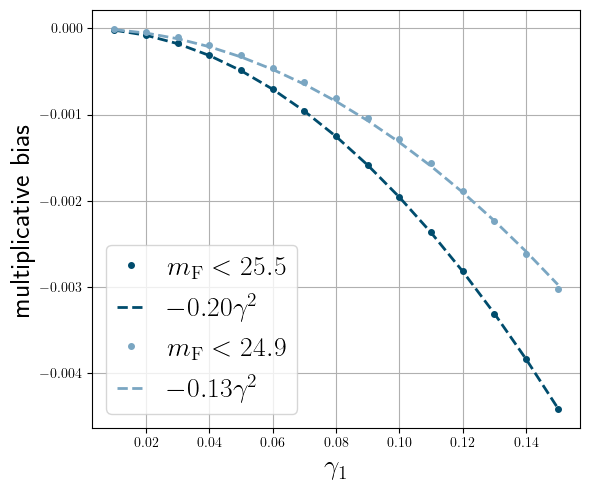

In [12]:
plt.close()
fig,axes=fpfs.pltutil.make_figure_axes(1,1)
ax=axes[0]
maglist=np.array([25.5,24.9])
for i in range(2):
    print(maglist[i])
    df_a=df.copy()[np.abs(df['binave']-maglist[i])<1e-5].to_records()
    inds=np.argsort(df_a['simid'])
    df_a=df_a[inds]
    x=df_a['simid']*0.01
    y=df_a['mbias']
    #yerr=df_a['merr']
    popt, pcov = curve_fit(func, x, y)
    ax.plot(x,y,label=r'$m_{\mathrm{F}}<%.1f$' %maglist[i],color=fpfs.pltutil.cblues[3*i],ls='',marker='o',markersize=4)
    ax.plot(x, func(x, *popt),color=fpfs.pltutil.cblues[3*i],ls='--',lw=2,alpha=1.,label=r'$%.2f \gamma^2$' %popt[0])
    del df_a
ax.set_xlabel('$\gamma_1$',fontsize=20)
ax.set_ylabel('multiplicative bias',fontsize=20)
ax.legend(fontsize=20,handlelength=1)
ax.grid()
plt.tight_layout()
fig.savefig('m_vs_gamma2.pdf')
fig.savefig('m_vs_gamma2.png')

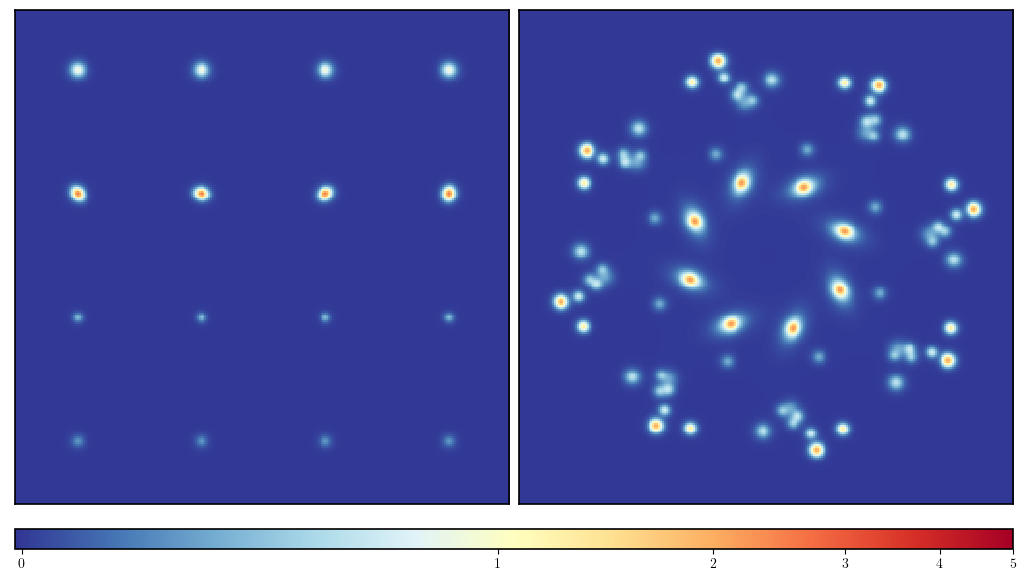

In [37]:
plt.close()

a=pyfits.getdata('./test1_prefactors/output/galaxy_basicCenter1/image-0-g1-2222.fits')[0:256,0:256]
b=pyfits.getdata('./test0_sim/output/galaxy_cosmo250/image-2-g1-2222.fits')

fig=plt.figure(figsize=(13,7))
grid = ImageGrid(fig, 111,     
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

ax=grid[0]
im=ax.imshow(a,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=5.))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax=grid[1]
im=ax.imshow(b,origin='lower',aspect='equal',cmap='RdYlBu_r',interpolation='None',\
             norm=simple_norm(a,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=5.))

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

ax.cax.colorbar(im)
fig.savefig('simulation_isoblend.png')

In [20]:
imdata.shape

(2560, 2560)